# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [41]:
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="

response = requests.get(query_url + city).json()
response


<class 'str'>


In [4]:
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="
name=[]
country=[]
humidity=[]
temp=[]
cloudy=[]
wind=[]
city_num=[]
lon=[]
lat=[]
date=[]

print("Beginning Data Retrieval")
print("-----------------------------")

for city in cities:
    response = requests.get(query_url + city).json()
    
    try:
        name.append(response['name'])
        country.append(response['sys']['country'])
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp'])
        cloudy.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        city_num.append(response['id'])
        lon.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        date.append(response['dt'])
        print(f"Processing Record | {city}")
        
    except KeyError:
        print("City not found.")
        

Beginning Data Retrieval
-----------------------------
Processing Record | barrow
Processing Record | busselton
Processing Record | butaritari
Processing Record | marawi
Processing Record | bredasdorp
Processing Record | punta arenas
Processing Record | geraldton
Processing Record | saldanha
City not found.
Processing Record | ashland
Processing Record | hobart
Processing Record | trairi
City not found.
Processing Record | rikitea
Processing Record | avarua
Processing Record | chokurdakh
Processing Record | tiarei
Processing Record | erzin
Processing Record | ambilobe
Processing Record | maragogi
Processing Record | cape town
Processing Record | tuktoyaktuk
Processing Record | waipawa
Processing Record | naze
Processing Record | hilo
Processing Record | mira
Processing Record | warwick
Processing Record | norwich
Processing Record | pevek
Processing Record | nikolskoye
Processing Record | albany
Processing Record | khorramshahr
Processing Record | amga
Processing Record | kampot
Proces

Processing Record | turukhansk
Processing Record | ketchikan
Processing Record | souillac
Processing Record | kaitangata
City not found.
Processing Record | bambous virieux
Processing Record | tahoua
Processing Record | port moresby
Processing Record | mount gambier
Processing Record | bayan
Processing Record | nalut
Processing Record | hokitika
Processing Record | bardstown
Processing Record | necochea
City not found.
Processing Record | otautau
Processing Record | severnyy
Processing Record | baherden
Processing Record | amberley
Processing Record | ous
Processing Record | ajaccio
Processing Record | marrakesh
Processing Record | kalyazin
Processing Record | aripuana
City not found.
Processing Record | chimbote
Processing Record | magadan
Processing Record | saint-francois
Processing Record | baiyin
Processing Record | djibo
City not found.
Processing Record | kuching
Processing Record | karoi
Processing Record | temecula
Processing Record | boa vista
Processing Record | maningrida
P

Processing Record | lambarene
Processing Record | kidal
Processing Record | vanderhoof
Processing Record | vila do maio
Processing Record | colborne
Processing Record | akdepe
Processing Record | pisco
Processing Record | newtyle
Processing Record | hobyo
Processing Record | idlib
Processing Record | muscat
Processing Record | dembi dolo
Processing Record | moree
Processing Record | bentiu
Processing Record | pringsewu
Processing Record | armidale
Processing Record | ola
City not found.
Processing Record | jutai
City not found.
Processing Record | hue
Processing Record | virginia beach


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
pwd

'C:\\Users\\ethom\\Desktop\\Python_APIs_Challenge\\starter_code\\Weather'

In [6]:
data = {'City': name,
         'Country': country, 
         'Humidity': humidity,
        'Lat': lat,
        'Lng': lon,
         'Temperature': temp, 
         'Cloud Cover': cloudy,
           'Winds': wind,
           'Date': date}
city_weather = pd.DataFrame(data)
city_weather

,City,Country,Humidity,Lat,Lng,Temperature,Cloud Cover,Winds,Date
0,Barrow,US,85,71.2906,-156.7887,-29.20,1,12.66,1612413528
1,Busselton,AU,44,-33.6500,115.3333,71.87,0,1.99,1612413528
2,Butaritari,KI,83,3.0707,172.7902,81.48,83,16.24,1612413528
3,Marawi,PH,80,7.9986,124.2928,82.99,11,8.01,1612413529
4,Bredasdorp,ZA,82,-34.5322,20.0403,62.60,73,4.74,1612413529
...,...,...,...,...,...,...,...,...,...
546,Armidale,AU,64,-30.5167,151.6500,72.00,18,7.00,1612413661
547,Ola,RU,84,59.5833,151.2833,1.54,44,15.21,1612413661
548,Jutaí,BR,97,-5.1833,-68.9000,73.94,100,3.53,1612413661
549,Hue,VN,88,16.4667,107.6000,73.40,75,7.74,1612413447


In [7]:
city_weather.to_csv(output_data_file, index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
city_weather.loc[city_weather['Humidity']>100]


,City,Country,Humidity,Lat,Lng,Temperature,Cloud Cover,Winds,Date


In [9]:
#  Get the indices of cities that have humidity over 100%.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

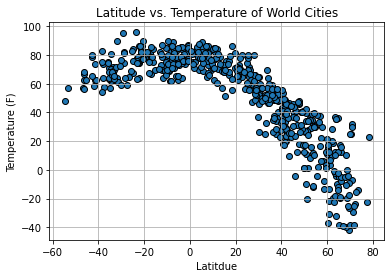

In [29]:
plt.scatter(city_weather['Lat'], city_weather['Temperature'], edgecolor='black')
plt.title('Latitude vs. Temperature of World Cities')
plt.xlabel('Latitdue')
plt.ylabel('Temperature (F)')
plt.grid()
plt.savefig(f'../../output_data/LatVsTemp.png')
plt.show()

## Latitude vs. Humidity Plot

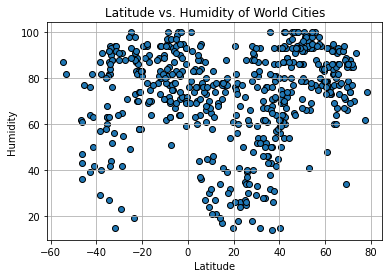

In [30]:
plt.scatter(city_weather['Lat'], city_weather['Humidity'], edgecolor='black')
plt.title('Latitude vs. Humidity of World Cities')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()
plt.savefig(f'../../output_data/LatVsHumid.png')
plt.show()

## Latitude vs. Cloudiness Plot

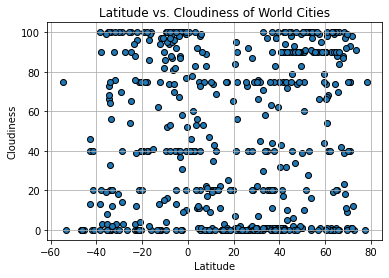

In [31]:
plt.scatter(city_weather['Lat'], city_weather['Cloud Cover'], edgecolor='black')
plt.title('Latitude vs. Cloudiness of World Cities')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()
plt.savefig(f'../../output_data/LatVsCloud.png')
plt.show()

## Latitude vs. Wind Speed Plot

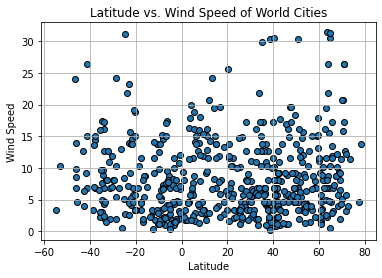

In [32]:
plt.scatter(city_weather['Lat'], city_weather['Winds'], edgecolor='black')
plt.title('Latitude vs. Wind Speed of World Cities')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.savefig(f'../../output_data/LatVsWind.png')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

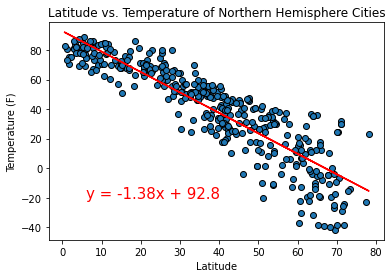

In [33]:
north_cities = city_weather.loc[city_weather['Lat']>=0]
x = north_cities['Lat']
y = north_cities['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, edgecolor='black')
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,-20),fontsize=15,color="red")
plt.title('Latitude vs. Temperature of Northern Hemisphere Cities')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.savefig(f'../../output_data/LatVsTempNorth.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

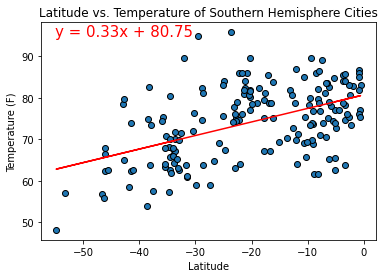

In [34]:
south_cities = city_weather.loc[city_weather['Lat']<0]
x = south_cities['Lat']
y = south_cities['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, edgecolor='black')
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-55,95),fontsize=15,color="red")
plt.title('Latitude vs. Temperature of Southern Hemisphere Cities')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.savefig(f'../../output_data/LatVsTempSouth.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

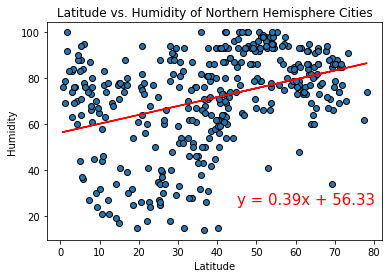

In [35]:
north_cities = city_weather.loc[city_weather['Lat']>=0]
x = north_cities['Lat']
y = north_cities['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, edgecolor='black')
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(45,25),fontsize=15,color="red")
plt.title('Latitude vs. Humidity of Northern Hemisphere Cities')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig(f'../../output_data/LatVsHumidNorth.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

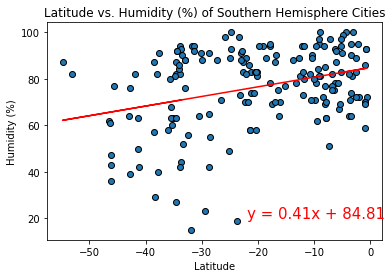

In [36]:
south_cities = city_weather.loc[city_weather['Lat']<0]
x = south_cities['Lat']
y = south_cities['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, edgecolor='black')
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-22,20),fontsize=15,color="red")
plt.title('Latitude vs. Humidity (%) of Southern Hemisphere Cities')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig(f'../../output_data/LatVsHumidSouth.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

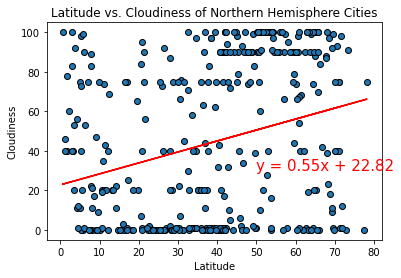

In [37]:
north_cities = city_weather.loc[city_weather['Lat']>=0]
x = north_cities['Lat']
y = north_cities['Cloud Cover']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, edgecolor='black')
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(50,30),fontsize=15,color="red")
plt.title('Latitude vs. Cloudiness of Northern Hemisphere Cities')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig(f'../../output_data/LatVsCloudNorth.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

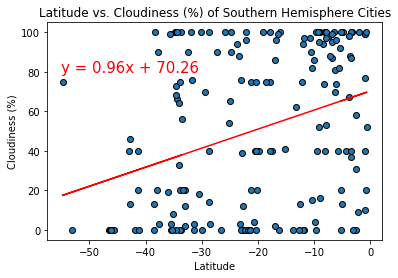

In [38]:
south_cities = city_weather.loc[city_weather['Lat']<0]
x = south_cities['Lat']
y = south_cities['Cloud Cover']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, edgecolor='black')
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-55,80),fontsize=15,color="red")
plt.title('Latitude vs. Cloudiness (%) of Southern Hemisphere Cities')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig(f'../../output_data/LatVsCloudSouth.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

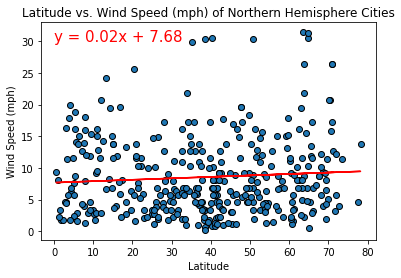

In [39]:
north_cities = city_weather.loc[city_weather['Lat']>=0]
x = north_cities['Lat']
y = north_cities['Winds']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, edgecolor='black')
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.title('Latitude vs. Wind Speed (mph) of Northern Hemisphere Cities')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig(f'../../output_data/LatVsWindNorth.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

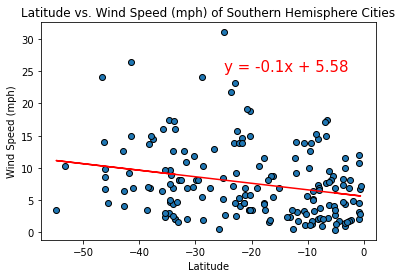

In [40]:
south_cities = city_weather.loc[city_weather['Lat']<0]
x = south_cities['Lat']
y = south_cities['Winds']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, edgecolor='black')
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
plt.title('Latitude vs. Wind Speed (mph) of Southern Hemisphere Cities')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig(f'../../output_data/LatVsWindSouth.png')
plt.show()